In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

Para el circuito con $Z_L = 10 + 15j$ se obtuvieron:
Solución 1:
\begin{align}
&C_p = 6,366\;pF&
& L_s = 795,77\;pH \\
\end{align}
Solución 2:
\begin{align}
&L_p = 3.9788\;nH&
&C_s = 4.5472\;pF \\
\end{align}

In [10]:
Zo = 50
ZL = 10+15J
Cp = 6.3661977236758135e-12
Ls = 7.957747154594766e-10
Lp = 3.9788735772973836e-09
Cs = 4.5472840883398665e-12

\begin{align*}
    &\text{Opción 1:}&
    &\text{Opción 2:} \\
    & Z_{in} = \frac{-j}{6,36pF\cdot \omega}\;//\;(Z_L + 795pF\cdot\omega j)&
    &Z_{in} = 3.98nH\cdot\omega j\;//\; \left ( Z_L + \frac{-j}{4.55pF\cdot \omega} \right ) \\
\end{align*}


In [11]:
Zin_1 = lambda f: ((-1J/(Cp*2*math.pi*f))**-1 + (ZL+(Ls*2*math.pi*f*1J))**-1)**-1
Zin_2 = lambda f: ((Lp*2*math.pi*f*1J)**-1 + (ZL+(-1J/(Cs*2*math.pi*f)))**-1)**-1
print(Zin_1(1e9), Zin_2(1e9))
r = lambda Zin: (Zin-Zo)/(Zin+Zo)
ROE = lambda r: (1+abs(r)) / (1-abs(r))
RL = lambda r: -20*np.log(abs(r))

(50+0j) (50+0j)


In [12]:
x = np.linspace(900*1e6, 1.1*1e9, 1000000)

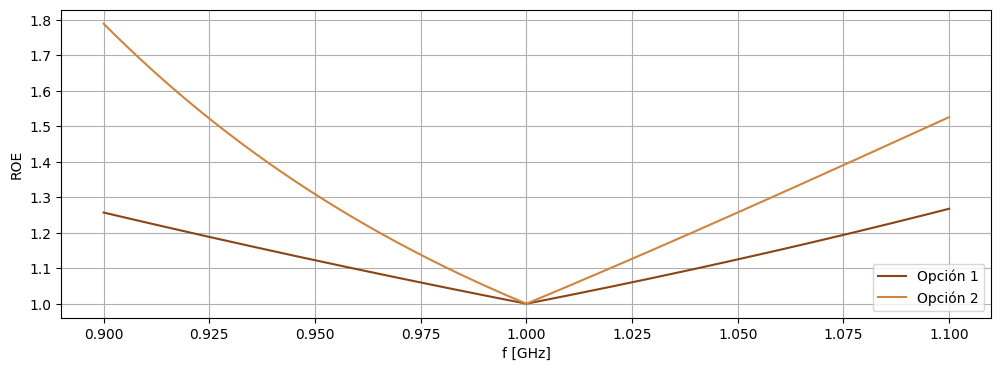

In [13]:
fig = plt.figure(figsize=(12,4))
plt.plot(x*1e-9, ROE(r(Zin_1(x))), label="Opción 1", color="saddlebrown")
plt.plot(x*1e-9, ROE(r(Zin_2(x))), label= "Opción 2", color="peru")
plt.grid()
plt.xlabel("f [GHz]")
plt.ylabel("ROE")
plt.legend(loc="lower right")
plt.savefig("Ej1-Carga2_ROE")
plt.show()

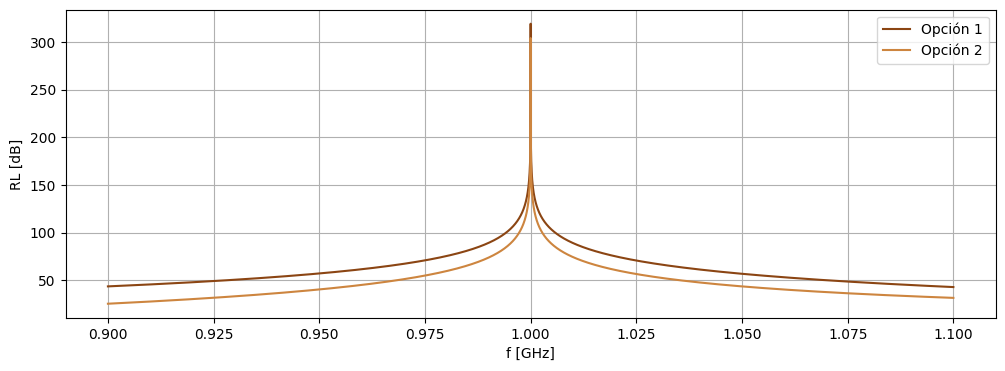

In [14]:
fig = plt.figure(figsize=(12, 4))
plt.plot(x * 1e-9, RL(r(Zin_1(x))), label="Opción 1", color="saddlebrown")
plt.plot(x * 1e-9, RL(r(Zin_2(x))), label="Opción 2", color="peru")
plt.grid()
plt.xlabel("f [GHz]")
plt.ylabel("RL [dB]")
plt.legend(loc="upper right")
plt.savefig("Ej1-Carga2_RL")
plt.show()